# Importing Importannt Lib

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import joblib
import pandas as pd


## Load the data

In [2]:
import pandas as pd

CSV_PATH = "dataset.csv"         
df = pd.read_csv(CSV_PATH)

print(df.shape)      
df.head()           


(1190, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Doing EDA

In [3]:
print(df.info())          
print(df.describe())      
df['target'].value_counts(normalize=True)
# No missing values → no imputation needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.

target
1    0.528571
0    0.471429
Name: proportion, dtype: float64

### Split features & label, then train‑test split

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

##  Pre‑processing pipeline (One‑Hot + Scaling)


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1️⃣  Categorical and binary columns to one‑hot
cat_cols  = ['chest pain type', 'resting ecg', 'ST slope']
bin_cols  = ['sex', 'fasting blood sugar', 'exercise angina']
num_cols  = [c for c in X.columns if c not in cat_cols + bin_cols]

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols),
        ('bin', 'passthrough', bin_cols),         # already 0/1
        ('num', StandardScaler(), num_cols)
    ]
)


####  Choose & train a first model using LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_model = Pipeline(steps=[
        ('prep', preprocess),
        ('clf',  LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)


,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Evaluate

Accuracy: 0.8613445378151261
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       112
           1       0.85      0.89      0.87       126

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



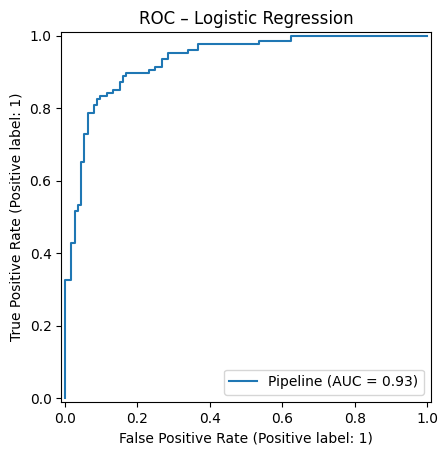

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC – Logistic Regression")
plt.show()


### Save the model

In [14]:
import joblib
joblib.dump(log_model, "heart_disease_model.pkl")
# Later → model = joblib.load("heart_disease_model.pkl")


['heart_disease_model.pkl']